In [1]:
# Import packages
import pandas_datareader.data as pdr
import pandas as pd
import datetime as dt
from pathlib import Path

In [2]:
# Install and upgrade packages
%pip install pandas-datareader
%pip install --upgrade pandas
%pip install --upgrade pandas-datareader

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'E:\pycharm\file\cse543final\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'E:\pycharm\file\cse543final\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'E:\pycharm\file\cse543final\Scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
# Get stock history of 10 years
start = dt.datetime(2010, 1, 1)
end = dt.datetime(2021, 1, 1)
stock_code = 'GE'
df = pdr.DataReader(stock_code, 'yahoo', start, end)
df.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,120.307693,116.538460,117.076920,118.846153,8720387.0,87.658867
2010-01-05,120.538460,118.846153,118.923080,119.461540,8391578.0,88.112770
2010-01-06,120.153847,118.769234,119.461540,118.846153,7210437.0,87.658867
2010-01-07,126.769234,118.692307,119.076920,125.000000,24111399.0,92.197823
2010-01-08,128.384613,125.153847,125.461540,127.692307,14964638.0,94.183632
2010-01-11,129.846161,127.230766,129.461533,128.923080,9967802.0,95.091438
2010-01-12,129.538467,127.461540,127.538460,129.000000,8400964.0,95.148163
2010-01-13,130.153839,127.461540,128.923080,129.461533,8494512.0,95.488571
2010-01-14,129.769226,128.307693,129.153839,128.461533,7456995.0,94.751007


In [7]:
# Compute monthly return for given stock
d = {'Date(Month)':[], 'Monthly Return($)':[]}
cur_month, cur_year, month_start = None, None, None
prev_price = None
for cur_date, row in df.iterrows():
  if not cur_month:
    cur_month, cur_year, month_start = cur_date.month, cur_date.year, row['Close']
  # Update monthly return for change in month
  if cur_date.month != cur_month:
    d['Date(Month)'].append(dt.datetime(cur_year, cur_month, 1))
    d['Monthly Return($)'].append(prev_price - month_start)
    cur_month, cur_year, month_start = cur_date.month, cur_date.year, row['Close']
  prev_price = row['Close']

# Example monthly return df
result_df = pd.DataFrame(data=d)
result_df.head()

,Date(Month),Monthly Return($)
0,2010-01-01,4.846153
1,2010-02-01,-1.461540
2,2010-03-01,17.692307
3,2010-04-01,4.076920
4,2010-05-01,-22.384605


In [9]:
# Save as CSV
filepath = Path(f'./CSV/{stock_code}.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
result_df.to_csv(filepath)  

- https://github.com/ljh-sufe/cse543final
- https://www.alphavantage.co/documentation/


In [ ]:
%pip install pyportfolioopt
%pip install yfinance

     |████████████████████████████████| 61 kB 3.5 MB/s 
     |████████████████████████████████| 2.8 MB 10.1 MB/s 
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31
     |████████████████████████████████| 63 kB 1.1 MB/s 
     |████████████████████████████████| 6.4 MB 11.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1

In [ ]:
from pypfopt import risk_models as rm
import pandas as pd 
import numpy as np 
import yfinance as yf

#defining some tickers
tickers = ["MSFT", "AMZN", "KO", "MA", "COST", 
           "LUV", "XOM", "PFE", "JPM", "UNH", 
           "ACN", "DIS", "GILD", "F", "TSLA"]

#importing ticker's stock data
data = yf.download(tickers, period="max")
prices = data["Adj Close"].dropna(how="all")

#calculating returns
daily_return = prices.diff(1)

#computing different covariance matrix 
s_cov = rm.sample_cov(daily_return, returns_data = True)
lw_cov = rm.risk_matrix(daily_return, returns_data = True, method = 'ledoit_wolf')
exp_cov = rm.risk_matrix(daily_return, returns_data = True, method = 'exp_cov')
semi_cov = rm.risk_matrix(daily_return, returns_data = True, method = 'semicovariance')
approx_cov = rm.risk_matrix(daily_return, returns_data = True, method = 'oracle_approximating')

#do PCA here - reduce information


[*********************100%***********************]  15 of 15 completed


/usr/local/lib/python3.7/dist-packages/pypfopt/risk_models.py:69: UserWarning: The covariance matrix is non positive semidefinite. Amending eigenvalues.
  "The covariance matrix is non positive semidefinite. Amending eigenvalues."


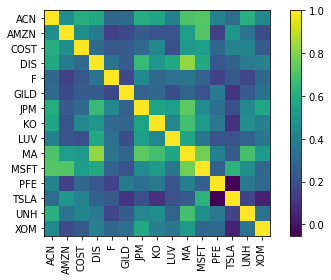

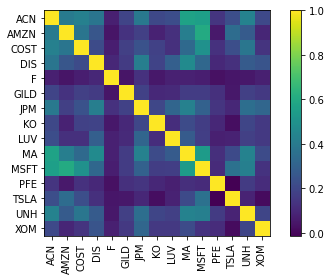

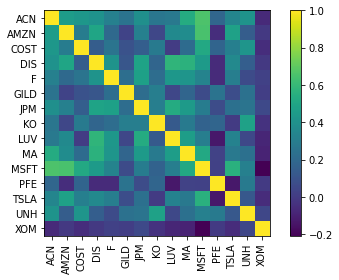

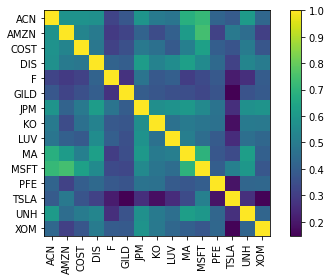

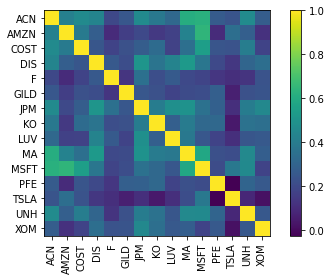

In [ ]:
from pypfopt import plotting
plotting.plot_covariance(s_cov, plot_correlation=True);
plotting.plot_covariance(lw_cov, plot_correlation=True);
plotting.plot_covariance(exp_cov, plot_correlation=True);
plotting.plot_covariance(semi_cov, plot_correlation=True);
plotting.plot_covariance(approx_cov, plot_correlation=True);

In [10]:
import numpy as np
from numpy import count_nonzero

#calculating sparsity of each covariance matrix 
#closer to 1 means more sparse 

s_cov_spar = 1.0 - count_nonzero(np.array(s_cov)) / np.array(s_cov).size
lw_cov_spar = 1.0 - count_nonzero(np.array(lw_cov)) / np.array(lw_cov).size
exp_cov_spar = 1.0 - count_nonzero(np.array(exp_cov)) / np.array(exp_cov).size
semi_cov_spar = 1.0 - count_nonzero(np.array(semi_cov)) / np.array(semi_cov).size
approx_cov_spar = 1.0 - count_nonzero(np.array(approx_cov)) / np.array(approx_cov).size
print('The sparsity level of sample covariance matrix is:', s_cov_spar)
print('The sparsity level of Ledoit-Wolf Method covariance matrix is:', lw_cov_spar)
print('The sparsity level of exponential covariance matrix is:', exp_cov_spar)
print('The sparsity level of semi-covariance matrix is:', semi_cov_spar)
print('The sparsity level of oracle approximated covariance matrix is:', approx_cov_spar)

NameError: name 's_cov' is not defined

In [ ]:
#creating sparse matrix 
#if a value in the matrix is close enough to zero, then replace that element with zero 
#next, need to insure that the cov matrix is still positive semi-def
#if not still pos-semi def then make psd by adding elements in unique loactions in the matrix 

def sparsify(COV_MATRIX):
  #converting to numpy array 
  mat = np.array(COV_MATRIX)
  
  #replacing all values in array with zero if it meets a specific threshold requirement 
  mat = np.where(mat < 0.01 and mat > -0.01, 0, mat)

  #checking if psd 
  w, v = LA.eig(np.diag((1, 2, 3)))
  if np.any(w < 0):
    #need to add elements to adjust new sparse matrix to make it psd 

  else: 
    print('Matrix is PSD')

  return mat 

